### MNIST & sklearn: Jasper Sandhu

Importing the required libraries for the assignment

In [1]:
import numpy as np 
import random 
import matplotlib.pyplot as plt
# from mnist import MNIST
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Loading MNIST dataset from mnist library

In [7]:
print("Loading dataset from file:")

mndata = MNIST('dataset/extract')

#Loading images and labels into 2 sets of data arrays.
trainimages, trainlabels = mndata.load_training()
testimages, testlabels = mndata.load_testing()

print("Total training images",len(trainimages))
print("Total training labels",len(trainlabels))
print("Total test images",len(testimages))
print("Total test labels",len(testlabels))

Loading dataset from file:
Total training images 60000
Total training labels 60000
Total test images 10000
Total test labels 10000


#### The size of the array match the information from "http://yann.lecun.com/exdb/mnist/". Performing additional inspection on the data.

In [6]:
#print(trainimages.shape)
print("Training images dimension: ", np.shape(trainimages))
print("Training labels dimension: ", np.shape(trainlabels))

/home/js010582/.virtualenvs/ML/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


ValueError: could not broadcast input array from shape (60000,28,28) into shape (60000,)

#### The training images are in a [784 x 1] array while the training labels are in a [1 x 1] (instead of one hot encoding)

#### Decided to create a function to perform a sanity check on the labels of the 60,000 data points

In [6]:
#Data Array to Check
def datacheck(dataset):
    totalcount = 0
    for x in range(0,10):
        count = 0
        for y in range(len(dataset)):
            if dataset[y] == x:
                count+=1
        totalcount+=count
        print("Data with labels:", x, "\tWith counts:", count, "\nTotal:", totalcount)

In [7]:
#Performing a sanity check on the data
datacheck(trainlabels)

Data with labels: 0 	With counts: 5923 
Total: 5923
Data with labels: 1 	With counts: 6742 
Total: 12665
Data with labels: 2 	With counts: 5958 
Total: 18623
Data with labels: 3 	With counts: 6131 
Total: 24754
Data with labels: 4 	With counts: 5842 
Total: 30596
Data with labels: 5 	With counts: 5421 
Total: 36017
Data with labels: 6 	With counts: 5918 
Total: 41935
Data with labels: 7 	With counts: 6265 
Total: 48200
Data with labels: 8 	With counts: 5851 
Total: 54051
Data with labels: 9 	With counts: 5949 
Total: 60000


#### Was experimenting with reshape to convert the flattened image back into a 28x28 for pyplot output.

In [8]:
def singleimagecheck(data_images = trainimages, count = 0):
        #access first image
        first_image = data_images[count]
        print (trainlabels[count])
    
        first_image = np.array(first_image, dtype='uint8')
        pixels = first_image.reshape((28, 28))
        plt.imshow(pixels, cmap='gray')

In [9]:
def imagecheck(data_images = trainimages, rows = 1, columns = 1, count = 0):
    selection = rows * columns
    j = 1 #for plot index
    plt.subplots_adjust(hspace = 0.5)
    for x in range(selection):
        disp_image = data_images[x]
        disp_image = np.array(disp_image, dtype='uint8')
        plt.subplot(rows, columns, j)
        disp_pixels = disp_image.reshape((28,28)) #converting the flat array back into a 28x28
        plt.imshow(disp_pixels, cmap='gray') #displays the image
        #plt.text(0, 0, "\#:{}".format(x))
        j+=1 #increment plot index

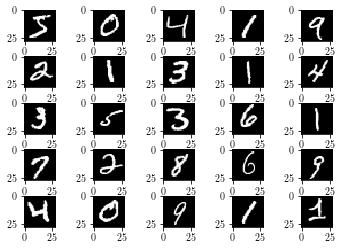

In [10]:
imagecheck(trainimages, 5, 5, 1)

#### After gaining familiarity with the data it's time to resume with the assignment.

#### Find all the 9s!

#### "In this secion you should build up a classifier that can distinguish number 9 from every other numbers. (reusing code and libraries are okay as long as you explain what is going on). For each section below you need to measure your performance. So, make sure to run the performance check at every part."

#### 1.1 Find the 9s using K-Nearest neighbors for Minkowski metric of order (1, 2, 3).

In [11]:
from sklearn.model_selection import train_test_split
#Reducing the dataset into a smaller sample size (10% of Population). Going with 70% Training, 15% Validation, 15% Test of 6000 total size 
print("\nNew Array Size trimmed:")

#Splitting Splitting into 85/15 Training/Test
(tr_images, te_images, tr_labels, te_labels) = train_test_split(trainimages[:6000], trainlabels[:6000], test_size =0.15)

#Splitting 85/15 Training/Validation (Training is now 70%)
(tr_images, val_images, tr_labels, val_labels) = train_test_split(tr_images, tr_labels, test_size=0.15, random_state = 20)


print("Total training images: {}".format(len(tr_images)))
print("Total training labels",len(tr_labels))
print("Total training images",len(val_images))
print("Total training labels",len(val_labels))
print("Total test images",len(te_images))
print("Total test labels",len(te_labels))


New Array Size trimmed:
Total training images: 4335
Total training labels 4335
Total training images 765
Total training labels 765
Total test images 900
Total test labels 900


In [12]:
#knn(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs) From website for reference.

kval = range(1,16) #1 to 15 range of k neighbors to use
#kval = [1,5,10,15,20,25,30,35,40,50,55] #experimented with higher range to see where it dropped off

total_scores = []

for x in kval:
    knnclass = KNeighborsClassifier(n_neighbors=x) #Creating an object from a KNeighborsClassifer
          
    knnclass.fit(tr_images, tr_labels) #Training the model with our training data
    
    temp_scores = knnclass.score(val_images, val_labels) #Using our validation set to check for accuracies
    print("K Neighbors = {0}, Score of: {1:2.2f}%".format(x,(temp_scores*100)))
          
    total_scores.append(temp_scores)

K Neighbors = 1, Score of: 93.07%
K Neighbors = 2, Score of: 91.37%
K Neighbors = 3, Score of: 92.68%
K Neighbors = 4, Score of: 93.07%
K Neighbors = 5, Score of: 92.68%
K Neighbors = 6, Score of: 93.07%
K Neighbors = 7, Score of: 92.81%
K Neighbors = 8, Score of: 92.03%
K Neighbors = 9, Score of: 92.03%
K Neighbors = 10, Score of: 91.50%
K Neighbors = 11, Score of: 90.85%
K Neighbors = 12, Score of: 90.72%
K Neighbors = 13, Score of: 90.85%
K Neighbors = 14, Score of: 90.59%
K Neighbors = 15, Score of: 90.72%


In [13]:
highest_score = np.argmax(total_scores)
print("The highest accuracy was using a K value of: {0}, giving an accuracy of {1:2.2f}%".format(highest_score+1, total_scores[highest_score]*100))

The highest accuracy was using a K value of: 1, giving an accuracy of 93.07%


#### Trying different different orders of Minkowski Metric (1, 2, 3)

In [14]:
#knn(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs) From website for reference.

kval = 1 #Using K = 1 that we found earlier.
mink_metric = range (1,4) #Used to check for different minkowski metric from 1 - 3
total_scores = []

for x in mink_metric:
    knnclass = KNeighborsClassifier(n_neighbors=kval, p=x) #Creating an object from a KNeighborsClassifer
          
    knnclass.fit(tr_images, tr_labels) #Training the model with our training data
    
    temp_scores = knnclass.score(val_images, val_labels) #Using our validation set to check for accuracies
    print("Minkowski Metric of : {0}, Score of: {1:2.2f}%".format(x,(temp_scores*100)))
          
    total_scores.append(temp_scores)

Minkowski Metric of : 1, Score of: 91.63%
Minkowski Metric of : 2, Score of: 93.07%
Minkowski Metric of : 3, Score of: 93.99%


#### Using a K value of 3, and a Minkowski Metric of 3, we can find the total amount of 9's in our test set.

In [15]:
kval = 3 #K-Nearest Neighbor
pval = 3 #Minkowski Metric
knnclass = KNeighborsClassifier(n_neighbors=kval, p=pval)
knnclass.fit(tr_images, tr_labels) #Training the model with our training data
temp_scores = knnclass.score(val_images, val_labels) #Using our validation set to check for accuracies
print("K-Nearest of : {0}, Minkowski Metric of : {1}, Score of: {2:2.2f}%".format(kval,pval,(temp_scores*100)))

K-Nearest of : 3, Minkowski Metric of : 3, Score of: 93.20%


In [16]:
predicted_values = knnclass.predict(te_images)

#### Created "findresults" to filter the results from running the prediction on the test_images

In [69]:
def findresults(predicted_values = predicted_values ,value = 0):
    pred_count = 0
    actu_count = 0
    incorrect_count = 0
    faulty_images = []

    for x in np.arange(len(predicted_values)):
        if predicted_values[x] == value:
            pred_count+=1

    for y in np.arange(len(te_labels)): 
        if te_labels[y] == value:
            actu_count+=1

    for z in np.arange(len(predicted_values)):
        if predicted_values[z] == value and te_labels[z] != value:
            print("Incorrect match of {0} : {1} and {2}".format(value,predicted_values[z],te_labels[z]))
            faulty_images.append(te_images[z])
            incorrect_count+=1

    real_count = pred_count - incorrect_count
    print("Incorectly classified: {}".format(incorrect_count))
    print("Predicted Count: {} from the Actual Count in the test set: {}".format(pred_count, actu_count))
    print("Actually found: {0} giving a accuracy of {1:2.2f}%".format(real_count,(real_count/actu_count)*100))
    return faulty_images

In [71]:
faults = findresults(predicted_values, 9)

Incorrect match of 9 : 9 and 3
Incorrect match of 9 : 9 and 8
Incorrect match of 9 : 9 and 7
Incorrect match of 9 : 9 and 7
Incorrect match of 9 : 9 and 1
Incorrect match of 9 : 9 and 5
Incorrect match of 9 : 9 and 4
Incorectly classified: 7
Predicted Count: 94 from the Actual Count in the test set: 92
Actually found: 87 giving a accuracy of 94.57%


#### Using the function written earlier to display the falsely classified images.

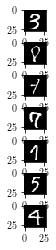

In [19]:
imagecheck(faults,len(faults))

#### It looks like the model struggled with partially written 4's and other handwritten text that aren't too far from looking like 9's

#### 1.2 Find the 9s using Decision tree.

In [20]:
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth = 100)
dt_classifier.fit(tr_images, tr_labels)
temp_scores = dt_classifier.score(val_images, val_labels) #Using our validation set to check for accuracies
print("Score of: {0:2.2f}%".format(temp_scores*100))

Score of: 77.78%


#### It's likely our accuracy would increase if we increased our Train/Validation/Test data.

In [73]:
predicted_values = dt_classifier.predict(te_images)
faults = findresults(predicted_values, 9)

Incorrect match of 9 : 9 and 4
Incorrect match of 9 : 9 and 4
Incorrect match of 9 : 9 and 8
Incorrect match of 9 : 9 and 3
Incorrect match of 9 : 9 and 1
Incorrect match of 9 : 9 and 5
Incorrect match of 9 : 9 and 5
Incorrect match of 9 : 9 and 8
Incorrect match of 9 : 9 and 7
Incorrect match of 9 : 9 and 5
Incorrect match of 9 : 9 and 8
Incorrect match of 9 : 9 and 8
Incorrect match of 9 : 9 and 7
Incorrect match of 9 : 9 and 0
Incorrect match of 9 : 9 and 5
Incorectly classified: 15
Predicted Count: 81 from the Actual Count in the test set: 92
Actually found: 66 giving a accuracy of 71.74%


#### Judging by our results it seems we've dramatically reduced our accuracy from KNN. Some improvement could be seen by spending time running through different parameters.

#### 1.3 Find the 9s using Random forests

In [22]:
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 3)
rf_classifier.fit(tr_images, tr_labels)
temp_scores = dt_classifier.score(val_images, val_labels) #Using our validation set to check for accuracies
print("Score of: {0:2.2f}%".format(temp_scores*100))

Score of: 77.78%


In [72]:
predicted_values = rf_classifier.predict(te_images)
faults = findresults(predicted_values, 9)

Incorrect match of 9 : 9 and 3
Incorrect match of 9 : 9 and 7
Incorrect match of 9 : 9 and 3
Incorrect match of 9 : 9 and 4
Incorrect match of 9 : 9 and 4
Incorrect match of 9 : 9 and 3
Incorrect match of 9 : 9 and 5
Incorrect match of 9 : 9 and 8
Incorrect match of 9 : 9 and 4
Incorrect match of 9 : 9 and 3
Incorrect match of 9 : 9 and 5
Incorrect match of 9 : 9 and 3
Incorrect match of 9 : 9 and 5
Incorrect match of 9 : 9 and 4
Incorrect match of 9 : 9 and 4
Incorrect match of 9 : 9 and 3
Incorrect match of 9 : 9 and 8
Incorrect match of 9 : 9 and 5
Incorrect match of 9 : 9 and 8
Incorrect match of 9 : 9 and 8
Incorrect match of 9 : 9 and 5
Incorectly classified: 21
Predicted Count: 68 from the Actual Count in the test set: 92
Actually found: 47 giving a accuracy of 51.09%


#### Seems like our accuracy is much worst than using KNN and Decision Tree. Again more time could be spent optimizing the parameters to help improve the accuracy using this model.

### Secion 2: Classify the Handwritten digits!

#### 1. "First forget about the labels and run the k-means algorithm to find whether there is an underlying patterns. So, first find the k clusters (here is obviously 10 clusters). Then look at their labels and find the accuracy. By doing this you are turning a supervised learning into an unsupervised learning!"

#### Using the function earlier and modifying it to show all the found numbers after running model.

In [83]:
def allresults(predicted_values = predicted_values, value = 0):
    pred_count = 0
    actu_count = 0
    incorrect_count = 0
    faulty_images = []

    for x in np.arange(len(predicted_values)):
        if predicted_values[x] == value:
            pred_count+=1

    for y in np.arange(len(te_labels)): 
        if te_labels[y] == value:
            actu_count+=1

    for z in np.arange(len(predicted_values)):
        if predicted_values[z] == value and te_labels[z] != value:
            #print("Incorrect match of {0} : {1} and {2}".format(value,predicted_values[z],te_labels[z]))
            faulty_images.append(te_images[z])
            incorrect_count+=1

    real_count = pred_count - incorrect_count
    #print("Incorectly classified: {}".format(incorrect_count))
    #print("Predicted Count: {} from the Actual Count in the test set: {}".format(pred_count, actu_count))
    print("Actual found {0}: {1} giving a accuracy of {2:2.2f}%".format(value, real_count,(real_count/actu_count)*100))
#   return faulty_images

In [44]:
import pandas as pd
from sklearn.cluster import KMeans
                  
km_clusters = KMeans(n_clusters=10).fit(tr_images)
tr_images_trained = km_clusters.labels_

In [54]:
km_clusters.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### I'm at a loss at how to accurately re-label the clusters to represent what they should be when accuracy is relatively poor.

#### 2. Find the digits using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).

In [26]:
#knn(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs) From website for reference.

kval = 1 #Using K = 1 that we found earlier.
mink_metric = range (1,4) #Used to check for different minkowski metric from 1 - 3
total_scores = []

for x in mink_metric:
    knnclass = KNeighborsClassifier(n_neighbors=kval, p=x) #Creating an object from a KNeighborsClassifer
          
    knnclass.fit(tr_images, tr_labels) #Training the model with our training data
    
    temp_scores = knnclass.score(val_images, val_labels) #Using our validation set to check for accuracies
    print("Minkowski Metric of : {0}, Score of: {1:2.2f}%".format(x,(temp_scores*100)))
          
    total_scores.append(temp_scores)

Minkowski Metric of : 1, Score of: 91.63%
Minkowski Metric of : 2, Score of: 93.07%
Minkowski Metric of : 3, Score of: 93.99%


In [59]:
kval = 3 #K-Nearest Neighbor
pval = 3 #Minkowski Metric
knnclass = KNeighborsClassifier(n_neighbors=kval, p=pval)
knnclass.fit(tr_images, tr_labels) #Training the model with our training data
temp_scores = knnclass.score(val_images, val_labels) #Using our validation set to check for accuracies
print("K-Nearest of : {0}, Minkowski Metric of : {1}, Score of: {2:2.2f}%".format(kval,pval,(temp_scores*100)))
predicted_values = knnclass.predict(te_images)

K-Nearest of : 3, Minkowski Metric of : 3, Score of: 93.20%


Actual found 0: 77 giving a accuracy of 84.62%
Actual found 1: 98 giving a accuracy of 92.45%
Actual found 2: 62 giving a accuracy of 65.26%
Actual found 3: 71 giving a accuracy of 69.61%
Actual found 4: 81 giving a accuracy of 84.38%
Actual found 5: 43 giving a accuracy of 67.19%
Actual found 6: 65 giving a accuracy of 73.03%
Actual found 7: 74 giving a accuracy of 83.15%
Actual found 8: 51 giving a accuracy of 67.11%
Actual found 9: 66 giving a accuracy of 71.74%


#### 3. Find the digits using Decision tree.

In [87]:
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth = 100)
dt_classifier.fit(tr_images, tr_labels)
temp_scores = dt_classifier.score(val_images, val_labels) #Using our validation set to check for accuracies
print("Score of: {0:2.2f}%".format(temp_scores*100))
predicted_values = dt_classifier.predict(te_images)

Score of: 76.99%


In [88]:
predicted_values = dt_classifier.predict(te_images)
for x in range(10):
    allresults(predicted_values, x)

Actual found 0: 76 giving a accuracy of 83.52%
Actual found 1: 97 giving a accuracy of 91.51%
Actual found 2: 61 giving a accuracy of 64.21%
Actual found 3: 66 giving a accuracy of 64.71%
Actual found 4: 82 giving a accuracy of 85.42%
Actual found 5: 42 giving a accuracy of 65.62%
Actual found 6: 65 giving a accuracy of 73.03%
Actual found 7: 67 giving a accuracy of 75.28%
Actual found 8: 49 giving a accuracy of 64.47%
Actual found 9: 63 giving a accuracy of 68.48%


#### 4. Find the digits using Random Forests.

In [89]:
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 3)
rf_classifier.fit(tr_images, tr_labels)
temp_scores = dt_classifier.score(val_images, val_labels) #Using our validation set to check for accuracies
print("Score of: {0:2.2f}%".format(temp_scores*100))
predicted_values = rf_classifier.predict(te_images)

Score of: 76.99%


In [90]:
for x in range(10):
    allresults(predicted_values, x)

Actual found 0: 85 giving a accuracy of 93.41%
Actual found 1: 105 giving a accuracy of 99.06%
Actual found 2: 54 giving a accuracy of 56.84%
Actual found 3: 74 giving a accuracy of 72.55%
Actual found 4: 84 giving a accuracy of 87.50%
Actual found 5: 21 giving a accuracy of 32.81%
Actual found 6: 71 giving a accuracy of 79.78%
Actual found 7: 74 giving a accuracy of 83.15%
Actual found 8: 41 giving a accuracy of 53.95%
Actual found 9: 42 giving a accuracy of 45.65%


#### 5. Comment on any significant difference between your results for the binary classifier vs multi-class classifiers.

#### After going through all this and answering this question, I can see the first part was to be a binary classifier but I ended up using a multi-class classifier to find individual digits.